<a href="https://colab.research.google.com/github/donakwale2020/Gitexample1/blob/master/ann1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
mnist=keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data( )

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
print("training data: {}, {}".format(train_images.shape,train_labels.shape))

training data: (60000, 28, 28), (60000,)


In [ ]:
print("Test data: {}, {}".format(test_images.shape,test_labels.shape))

In [10]:
class_labels=np.unique(train_labels)
print("There are {} classes in the dataset. they are: {}".format(len(class_labels),class_labels))

There are 10 classes in the dataset. they are: [0 1 2 3 4 5 6 7 8 9]


In [11]:
plt.figure(figsize=(8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Label: 5')

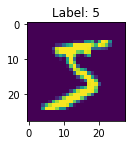

In [12]:
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

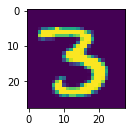

In [13]:
plt.subplot(1,3,3)
plt.imshow(train_images[12])

In [6]:
plt.show()

In [14]:
#As usual, we sacle our dataset to range between 0 and 1. 
# In this dataset, the pixel values range from 0 to 255.
#Dividing the data by 255 scales to the required range
train_images=train_images/255.0
test_images=test_images/255.0


In [15]:
#split training data to training and validation sets.
x_train=train_images[0:50000]
x_val=train_images[50000:]
y_train=train_labels[0:50000]
y_val=train_labels[50000:]

In [16]:
print("x_train: {}".format(x_train.shape))#print x_train:(50000,28,28)
print("x_val: {}".format(x_val.shape))#print x_val:(10000,28,28)
print("y_train: {}".format(y_train.shape))#print y_train:(50000)
print("y_val: {}".format(y_val.shape))#print y_val:(10000)

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [17]:
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train =to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [18]:
new_dimension = np.prod(train_images.shape[1:])
x_train=x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension) 
test_images=test_images.reshape(test_images.shape[0], new_dimension)

In [19]:
print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("test_images: {}".format(test_images.shape))

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [32]:
#inputs
#placeholders are not enabled in tf 2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
x = tf.placeholder(tf.float32, [None, new_dimension])
y = tf.placeholder(tf.float32, [None, no_labels ])


In [25]:
#create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  #first layer
  first_weight=tf.Variable(tf.random_uniform([new_dimension,first_layer_neurons]))
  first_bias=tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output=tf.nn.relu(tf.add(tf.matmul(x,first_weight),first_bias))
  #second layer 
  second_weight=tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias=tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output=tf.nn.relu(tf.add(tf.matmul(first_layer_output,second_weight),second_bias))
  #final layer 
  final_weight=tf.Variable(tf.random_uniform([second_layer_neurons,no_classes]))
  final_bias=tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight),  final_bias)

  return logits


In [26]:
logits=multilayer_perceptron(x,no_labels)

In [30]:
learning_rate=0.01
#we define te loss and optimiser for the network
loss_op=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y))
optimiser=tf.train.AdamOptimizer(learning_rate)
train_op=optimiser.minimize(loss_op)

In [34]:
#initialise the variables
init = tf.global_variables_initializer()

In [35]:
epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

In [49]:
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size

In [51]:
     for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={x: batch_x, y: batch_y})
      start += batch_size
      end += batch_size 
      #average loss
      average_cost += loss/iteration
     print("Epoch========{}".format(epoch))
  #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))
    
    

IndentationError: ignored